In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector

In [2]:
def create_bell_pair(qc, a, b):
    """The below gates are used to entangle the a bell pair in qc qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target

In [3]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

In [4]:
def measure_qubits(qc, a, b, crz, crx):
    qc.barrier()
    qc.measure(a,crz)
    qc.measure(b,crx)

In [5]:
def bob_gates(qc, qubit, crz, crx):
    # Here, c_if is used to control quantum gates with a classical bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply X if crx is 1
    qc.z(qubit).c_if(crz, 1) # Apply Z if crz is 1

In [6]:
psi = random_statevector(2)
# Display the vector
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))

C:\Users\sudee\AppData\Local\Temp\ipykernel_13808\2553387065.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  psi = random_statevector(2)


<IPython.core.display.Latex object>

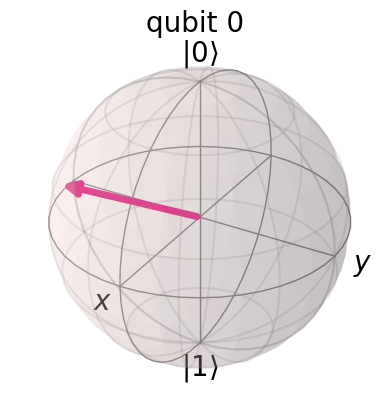

In [7]:
plot_bloch_multivector(psi)

In [8]:
init_gate = Initialize(psi)
init_gate.label = "init"

In [9]:
# Define registers – quantum register for 3 qubits, and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")

In [10]:
# Declare quantum circuit
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 0
# Apply init_gate to q0 to assign it a state of superposition
teleportation_circuit.append(init_gate, [0])
teleportation_circuit.barrier()

Bob, who already has the qubit q2, then applies the following gates depending on the state of the classical bits:

00 →  Do nothing

01  → Apply  X  gate

10  → Apply  Z  gate

11  → Apply  Z X gate

In [11]:
## STEP 1
# Entangle qubits q1 and q2
create_bell_pair(teleportation_circuit, 1, 2)

# Use barrier to separate steps

teleportation_circuit.barrier()

In [12]:
## STEP 2
# Apply gates on Alice's qubits – q0 and q1
alice_gates(teleportation_circuit, 0, 1)

In [13]:
## STEP 3
# Measure q0 and q1 onto classical bits, which will be sent to Bob.
measure_qubits(teleportation_circuit, 0, 1 ,crz ,crx)

teleportation_circuit.barrier()

In [14]:
## STEP 4
# Apply gates on Bob's qubit depending on message in classical bits
bob_gates(teleportation_circuit, 2, crz, crx)

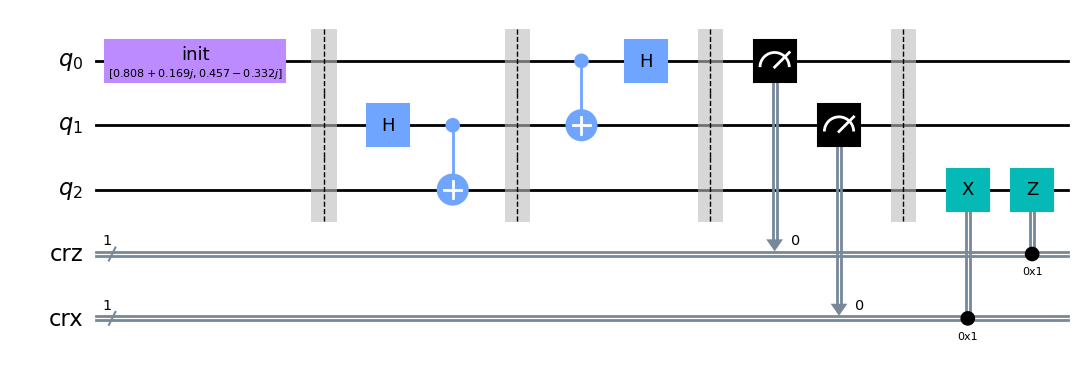

In [15]:
# View the circuit:
teleportation_circuit.draw(output='mpl')

In [16]:
# Define the simulator
sim = Aer.get_backend('aer_simulator')
# Save the statevector of the quantum circuit for later viewing on the Bloch sphere
teleportation_circuit.save_statevector()
# Assemble the circuit
qobj = assemble(teleportation_circuit)
# Execute
job = sim.run(qobj)

In [17]:
out_vector = job.result().get_statevector()
display(array_to_latex(out_vector, prefix="|\\psi\\rangle ="))

<IPython.core.display.Latex object>